# 6.6 Preprocess 35-00103 (Charlotte, NC)

I'm not sure whether this file has alraedy been preprocessed, but, let's do it anyway.

In [34]:
import geopandas
import pandas
import shapely

from cpe_help import Department, util

%matplotlib inline

In [6]:
dept = Department('35-00103')
path = dept.tabular_input_dir / '35-00103_UOF-OIS-P_prepped.csv'
df = pandas.read_csv(path, skiprows=[1])

In [7]:
df.head().T

,0,1,2,3,4
INCIDENT_UNIQUE_IDENTIFIER,1649,1739,1953,2421,1875
INCIDENT_DATE,2005-03,2005-03,2005-05,2005-08,2005-04
SUBJECT_RACE,Black,White,White,Black,Black
SUBJECT_GENDER,Male,Male,Male,Male,Male
SUBJECT_AGE_IN_YEARS,33,25,67,25,19
SUBJECT_INJURY_TYPE,Miss,Non-Fatal Injury,Fatal Injury,Miss,Miss
LOCATION_LATITUDE,35.2245,35.227,35.199,35.2193,35.1444
LOCATION_LONGITUDE,-80.8965,-80.7293,-80.7563,-80.8764,-80.8618
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,"WILKINSON BOULEVARD, CHARLOTTE 28208","KEYWAY BOULEVARD, CHARLOTTE 28205","AMITY SPRINGS DRIVE, CHARLOTTE 28212","BETHEL ROAD, CHARLOTTE 28208","LEAFCREST LANE, CHARLOTTE 28216"


# Date

We have year and month variables.

In [9]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%Y-%m')

In [13]:
datef.describe()

count                      77
unique                     60
top       2013-09-01 00:00:00
freq                        4
first     2005-03-01 00:00:00
last      2018-02-01 00:00:00
Name: INCIDENT_DATE, dtype: object

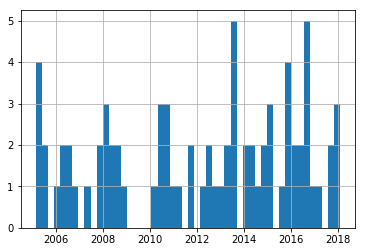

In [11]:
datef.hist(bins=50)

In [14]:
datef.head()

0   2005-03-01
1   2005-03-01
2   2005-05-01
3   2005-08-01
4   2005-04-01
Name: INCIDENT_DATE, dtype: datetime64[ns]

Perfect!

# Location

In [33]:
dept.load_external_shapefile().crs

{'init': 'epsg:4326'}

In [26]:
lat = df['LOCATION_LATITUDE']
lon = df['LOCATION_LONGITUDE']

In [27]:
lat.isnull().mean()

0.012987012987012988

In [28]:
lon.isnull().mean()

0.012987012987012988

In [29]:
(lat.isnull() == lon.isnull()).all()

True

In [30]:
geocoded = lat.notnull()

In [31]:
Point = shapely.geometry.Point
points = [Point(lon, lat) if coded else Point()
          for lat, lon, coded in zip(lat, lon, geocoded)]  # careful with state

In [37]:
gdf = geopandas.GeoDataFrame(df, geometry=points, crs=util.crs.epsg4326)
gdf.head()

,INCIDENT_UNIQUE_IDENTIFIER,INCIDENT_DATE,SUBJECT_RACE,SUBJECT_GENDER,SUBJECT_AGE_IN_YEARS,SUBJECT_INJURY_TYPE,LOCATION_LATITUDE,LOCATION_LONGITUDE,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,geometry
0,1649,2005-03,Black,Male,33.0,Miss,35.224496,-80.896504,"WILKINSON BOULEVARD, CHARLOTTE 28208",POINT (-80.89650368 35.22449626)
1,1739,2005-03,White,Male,25.0,Non-Fatal Injury,35.226991,-80.729299,"KEYWAY BOULEVARD, CHARLOTTE 28205",POINT (-80.72929894000001 35.22699116)
2,1953,2005-05,White,Male,67.0,Fatal Injury,35.199025,-80.756286,"AMITY SPRINGS DRIVE, CHARLOTTE 28212",POINT (-80.75628578 35.19902512)
3,2421,2005-08,Black,Male,25.0,Miss,35.219339,-80.876367,"BETHEL ROAD, CHARLOTTE 28208",POINT (-80.87636738 35.2193387)
4,1875,2005-04,Black,Male,19.0,Miss,35.144363,-80.861774,"LEAFCREST LANE, CHARLOTTE 28216",POINT (-80.86177397 35.14436326)


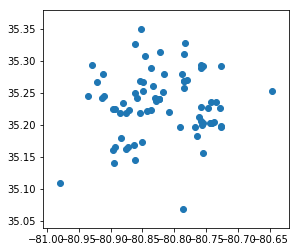

In [38]:
gdf.plot()